# Titanic Survival Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## What data will I use

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

## Submission data

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)


## Program start

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import os 


#Make sure we're in the correct directory
DIR = 'D:\GitHub\Kaggle_problems\Titanic_notebook'
print(os.getcwd())
os.chdir(DIR)
print(os.getcwd())

#Import the training data and print head
train_df = pd.read_csv('train.csv')

train_df.head()

C:\Users\wolfg
D:\GitHub\Kaggle_problems\Titanic_notebook


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have passenger id, survival status, boarding class, name, sex, age, the number of siblings they have aboard (SibSp) or the number of parents/children (Parch) onboard, as well as their ticket ID, how much they paid for the ticket, their cabin, and what city they embarked from. 

Knowing what we know, we have a pretty good idea that "Women and Children" first means women and children had a better survival chance. We also know that the lower class customers were put lower into the ships hull - meaning if they were inside the ship they'd have a more difficult time escaping the sinking vessel - especially since it's believed the titanic sank in around 5 minutes. 

The following code will investigate unique values within sex, age, passenger ID, cabin, and embarked as well as various distributions of these variables to try to understand their breakdown and significance.

In [159]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


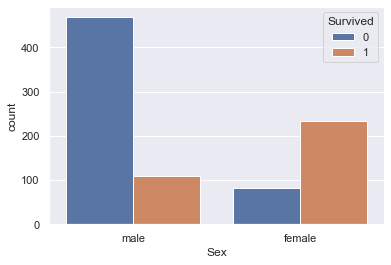

In [160]:
plt.figure(1)
sns.countplot(x='Sex',hue='Survived',data = train_df)


Here we see that certainly more women then men survived, indiciating sex had some role to play in survival. 

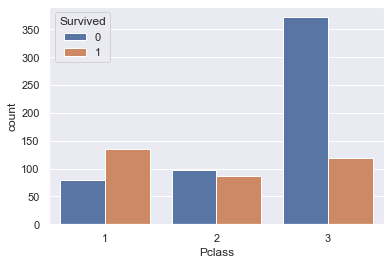

In [22]:
plt.figure(2)
sns.countplot(x='Pclass',hue='Survived',data = train_df)


Again as we originally imagined it appears that the class had a hand in survival as well. While at a glance it appears that third class a significant number of survivers, it's survival rate (normalized by the number of passengers in third class) is much lower than the other classes. This is visualized below. 

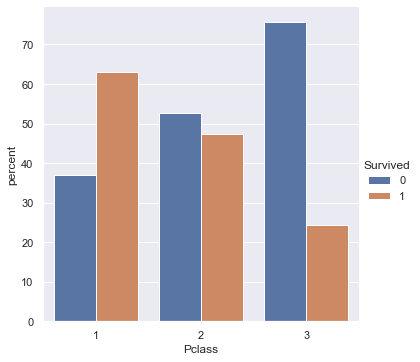

In [25]:
plt.figure(3)
x,y = 'Pclass', 'Survived'

(train_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

Looking at age, we're interested in the distribution of age of the passengers - as well as maybe the sex breakdown. The original posit was "Women and children" first. So we're interested in learning the ages of all passengers, the ages of the Male and Female populations, and maybe their survivability

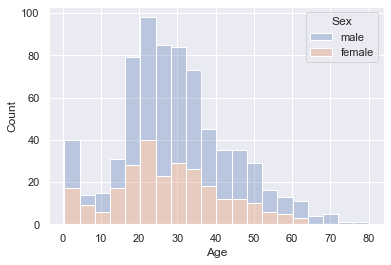

In [55]:
plt.figure(4)
sns.histplot(x = 'Age',hue = 'Sex', multiple = 'stack', data = train_df, alpha = 0.3)

The mean age is 29.69911764705882
The standard dev. of age is 14.526497332334044


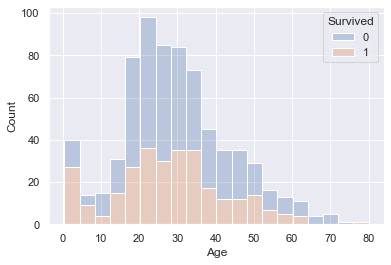

In [54]:
plt.figure(5)
sns.histplot(x = 'Age',hue = 'Survived', data = train_df, multiple='stack', alpha = 0.3)
age_mean = train_df.Age.mean()
age_std = train_df.Age.std()

As the adage goes, so shall we bin the data. Lets create 4 bins, to capture "children, young adults, Adults, seniors".

{Children : 0-18, Young Adults : 19-30, Adults : 31-55, Seniors : 56+}

In [3]:
def age_cat(var):
    if var <= 18:
        out = 'C'
    elif var <= 30:
        out = 'YA'
    elif var <= 55:
        out = 'A'
    else:
        out = 'S'
    return out


In [4]:
#test function above
#print(age_cat(1)) #Should return 'C'
#print(age_cat(18)) #Should return 'C'
#print(age_cat(29)) #Should return 'YA'
#print(age_cat(30)) #Should return 'YA'
#print(age_cat(40)) #Should return 'A'
#print(age_cat(60)) #Should return 'S'

##after test, use function to create 'AGE_CAT' columns

train_df['Age_CAT'] = train_df['Age'].apply(lambda age: age_cat(age))
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,YA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,A
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,YA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,A
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,A


Okay, so far we know we want to use the following features: Sex, Age category, and Pclass. I'd also like to try to incorporate Parch and SibSp in the calculation for survival.


The last thing I'll do before breaking out these features is look at survival rate per catagory. I'll just do some manual calcs and print them out below just to understand and justify my results. 

In [5]:
women_survived = train_df.loc[train_df.Sex == 'female']['Survived']
men_survived = train_df.loc[train_df.Sex == 'male']['Survived']

print('{}% of women survived'.format(sum(women_survived)/len(women_survived)))
print('{}% of men survived'.format(sum(men_survived)/len(men_survived)))

0.7420382165605095% of women survived
0.18890814558058924% of men survived


Seeing as 74% of women survived vs 19% of men, it appears gender may suggest survival

0.5035971223021583% of children survived  while 0.35555555555555557% of young adults survived

0.4226415094339623% of adults survived  while 0.29493087557603687% of seniors survived

The following values are the percentage of passengers which falls into the age groups of children, young adults, adults, and seniors respectively:  0.15600448933782268 0.30303030303030304 0.29741863075196406 0.24354657687991021


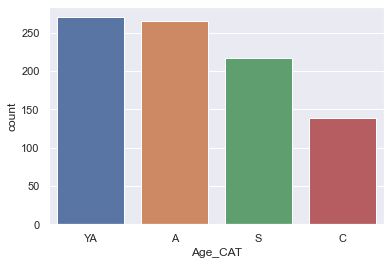

In [166]:
children_survived = train_df.loc[train_df.Age_CAT == 'C']['Survived']
yadult_survived = train_df.loc[train_df.Age_CAT == 'YA']['Survived']
adult_survived = train_df.loc[train_df.Age_CAT == 'A']['Survived']
senior_survived = train_df.loc[train_df.Age_CAT == 'S']['Survived']

print('{}% of children survived'.format(sum(children_survived)/len(children_survived)),
      ' while {}% of young adults survived'.format(sum(yadult_survived)/len(yadult_survived)))
print('')
print('{}% of adults survived'.format(sum(adult_survived)/len(adult_survived)),
      ' while {}% of seniors survived'.format(sum(senior_survived)/len(senior_survived)))
print('')
total_len = len(train_df)

print('The following values are the percentage of passengers which falls into the age groups of children, young adults, adults, and seniors respectively: ',
      len(children_survived)/total_len,len(yadult_survived)/total_len,
      len(adult_survived)/total_len,len(senior_survived)/total_len,)

plt.figure(6)
sns.countplot(x='Age_CAT',data= train_df)

The above shows that the majority of passengers were young adults and adults, so it appears that more adults survived than young adults since their populations were similar but the survival rates between the two were different by ~7% in favor of the adults.

Lastly we'll look at whether having family aboard gives you a higher survival rating.

In [6]:
with_parch_survived = train_df.loc[train_df.Parch != 0]['Survived']
without_parch_survived = train_df.loc[train_df.Parch ==  0]['Survived']

print('Those with parents/children aboard survived {}% of the time'.format(sum(with_parch_survived)/len(with_parch_survived)))
print('Those without parents/children aboard survived {}% of the time'.format(sum(without_parch_survived)/len(without_parch_survived)))
print()
with_siblings_survived = train_df.loc[train_df.SibSp != 0]['Survived']
without_siblings_survived = train_df.loc[train_df.SibSp ==  0]['Survived']

print('Those with siblings aboard survived {}% of the time'.format(sum(with_siblings_survived)/len(with_siblings_survived)))
print('Those without siblings aboard survived {}% of the time'.format(sum(without_siblings_survived)/len(without_siblings_survived)))
print()


Those with parents/children aboard survived 0.5117370892018779% of the time
Those without parents/children aboard survived 0.34365781710914456% of the time

Those with siblings aboard survived 0.4664310954063604% of the time
Those without siblings aboard survived 0.34539473684210525% of the time



Lets use the features as we specify below, including the familiar variables but let's also see what happens when we exclude siblings and parch features within the same model.

In [7]:
features = ['Sex', 'Age_CAT', 'Pclass', 'Parch', 'SibSp']
X = pd.get_dummies(train_df[features])

y = train_df['Survived']

X.head()


,Pclass,Parch,SibSp,Sex_female,Sex_male,Age_CAT_A,Age_CAT_C,Age_CAT_S,Age_CAT_YA
0,3,0,1,0,1,0,0,0,1
1,1,0,1,1,0,1,0,0,0
2,3,0,0,1,0,0,0,0,1
3,1,0,1,1,0,1,0,0,0
4,3,0,0,0,1,1,0,0,0


We now have our features for training our model. We'll want to verify that our training is working somehow, so we can try to split the data into a validation and training set. We'll use the built in train_test_split function and try to build a good random forest. We'll try a few tactics:

1. Random forest with all specified features
2. Random forest with depth/leaf finder
3. Random forest with selected features (using feature importance to eliminate features)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y, random_state = 10)

## 1. Random Forest with All Features

In [9]:
model_1 = RandomForestClassifier(n_estimators = 20,max_depth = 25, random_state = 100)
model_1.fit(train_X,train_y)
pred_1_y = model_1.predict(val_X)
mae_1 = mean_squared_error(val_y,pred_1_y)

print('The mae for the random forest model with all features is ',mae_1)

The mae for the random forest model with all features is  0.15695067264573992


As we see the mean squared error above and we'd like to drive this down. To attempt this, lets vary the depth and the number of leaves for our forests

## Random forest with depth/leaf finder

In [10]:
def depth_finder(trees,leaf):
    model = RandomForestClassifier(n_estimators = trees, max_depth = leaf, random_state = 100)
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    mae_score = mean_squared_error(val_y,pred_y)
    return mae_score

leaf_count = [5, 10, 25, 50, 75, 100]    
trees = [10, 50, 100, 150, 200]
best_score = 0
score = 0
best_leaf = 0
best_tree = 0
for tree in trees:
    for leaf in leaf_count:
        score = depth_finder(tree,leaf)
        if best_leaf == 0:
            best_leaf = leaf
            best_score = score
            best_tree = tree
        elif score < best_score:
            best_leaf = leaf
            best_score = score
            best_tree = tree        
print('best score is ',str(best_score),' from a random_forest with ',str(best_leaf),' nodes and ',best_tree, ' Trees')


best score is  0.15246636771300448  from a random_forest with  5  nodes and  10  Trees


Looking at the two scores from part 1 and part 2 it appears we've got a pretty good model that wont be improved by increasing the depth or trees. We were able to reduce the depth a little in part 2, suggesting our model could run faster with greater data. 

Now taking this information and reselecting the model, lets build with all available data and see our score, then lets find the feature importance and see if removing the lesser features gives us a better score.

## Random forest with selected features (using feature importance to eliminate features)

In [11]:
model_2 = RandomForestClassifier(n_estimators = best_leaf,max_depth = best_tree, random_state = 100)
model_2.fit(X,y)

print(X.columns)
print(model_2.feature_importances_)

Index(['Pclass', 'Parch', 'SibSp', 'Sex_female', 'Sex_male', 'Age_CAT_A',
       'Age_CAT_C', 'Age_CAT_S', 'Age_CAT_YA'],
      dtype='object')
[0.20417343 0.11221995 0.09555177 0.15601069 0.32169146 0.02525727
 0.03428714 0.03236531 0.01844298]


Looking at the feature importance in model 2, it appears we can eliminate all age information and retain 90.2% of the feature importance

In [18]:
features2 = ['Sex', 'Pclass', 'Parch', 'SibSp']
X2 = pd.get_dummies(train_df[features2])
y2 = train_df['Survived']
X2.head()

,Pclass,Parch,SibSp,Sex_female,Sex_male
0,3,0,1,0,1
1,1,0,1,1,0
2,3,0,0,1,0
3,1,0,1,1,0
4,3,0,0,0,1


In [13]:
train_X,val_X,train_y,val_y = train_test_split(X2,y, random_state = 10)

In [14]:
model_3 = RandomForestClassifier(n_estimators = best_leaf,max_depth = best_tree, random_state = 100)
model_3.fit(train_X,train_y)
pred_3_y = model_3.predict(val_X)
mae_3 = mean_squared_error(val_y,pred_3_y)

print('The mae for the random forest model with reduced features and optimized leaf/depth is ',mae_3)

The mae for the random forest model with reduced features and optimized leaf/depth is  0.20179372197309417


The model here has 0.20, which is not as good as the previous models, but does give decent results. This shows that if we thought .20 was a good target error, we could use an optimized model (leaf/depth) with reduced features to help run on a ton of data and give some good results. However, for the final model we'll use model 2 - a model trained on all training data with all selected features. 

## Final Train

Using model 2, lets get the test.csv set up in the correct format.

In [16]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Notice this is almost the same as before except without the Survived category.  

In [19]:
test_df['Age_CAT'] = test_df['Age'].apply(lambda age: age_cat(age))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_CAT
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,A
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,A
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,YA
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,YA


In [20]:
features = ['Sex', 'Age_CAT', 'Pclass', 'Parch', 'SibSp']
X_test = pd.get_dummies(test_df[features])

X_test.head()

,Pclass,Parch,SibSp,Sex_female,Sex_male,Age_CAT_A,Age_CAT_C,Age_CAT_S,Age_CAT_YA
0,3,0,0,0,1,1,0,0,0
1,3,0,1,1,0,1,0,0,0
2,2,0,0,0,1,0,0,1,0
3,3,0,0,0,1,0,0,0,1
4,3,1,1,1,0,0,0,0,1


In [23]:
y_test_predict = model_2.predict(X_test)

[0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [28]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_test_predict})
output.groupby('Survived').count()


,PassengerId
Survived,
0,250
1,168


In [29]:
#output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


If we were submitting to the contest we'd use the above to submit!